<a href="https://colab.research.google.com/github/Kamilya2020/Bayesian-Deep-Learning/blob/main/Machine_Learning_Na%C3%AEveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Packages Import

In [1]:
import pandas as pd                                      # Pandas: Read/Write IO Files
from sklearn.naive_bayes import GaussianNB               # Naive Bayes from Sickit Learn: Machine Learning Library which contains ML algorithms
from sklearn.neural_network import MLPClassifier         # Neural Network from Sickit Learn: Machine Learning Library which contains ML algorithms
from sklearn.svm import SVC                              # SVM from Sickit Learn: Machine Learning Library which contains ML algorithms
from sklearn.model_selection import train_test_split     # Model Selection: Split database into Train & Test Datasets
from sklearn.metrics import classification_report        # Classification Report: Performance evaluation of Machine Learning 

# 1. Business & Data Understanding

The main goal of this first step is to understand data:
    * Number of samples
    * Number of classes
    * Number of variables

In [11]:
df=pd.read_csv("bill_authentication.csv") # Read dataset
df.tail()                                 # Display the first five rows (df.tail() denotes the last five rows)

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [8]:
df.info() # List of colomns (variables & traget)
          # Number of samples
          # Types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [13]:
df.Class.value_counts() #we have 2 classes

0    762
1    610
Name: Class, dtype: int64

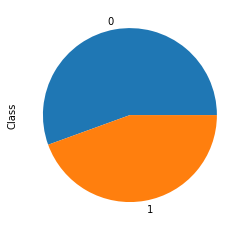

In [14]:
df.Class.value_counts().plot(kind='pie')

This dataset contains:
    * Number of samples: 1372
    * Number of classes: 2 (Class 0 and Class 1) => Binary Classification
    * Number of variables: 4 (Variance, Skewness, Curtosis, Entropy)

# 2. Data Preparation

The objectives of this step of CRIS Methodology are:
    * Split dataset into Train & Test dataset (80% for the train dataset and 20% for the test dataset):
        - Train dataset will be used to generate predictive model
        - test dataset will serve for the evaluation of the performance of your ML
    * Train dataset: 
        - Features vectors of training (X_train)  with its corresponding labels (y_train)
        - Features vectors of testing  (X_test)   with its corresponding labels (y_test)
In order to split the original dataset, we use the train_test_split:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size):
        With:
            X: Features vectors without labels
            y: Label vectors
            test_size: parameter in [0,1]

In [17]:
X=df.drop('Class',axis=1)
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [18]:
y=df['Class']
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
print(f"Train Size = {len(y_train)}/{len(y)}")
print(f"Test Size = {len(y_test)}/{len(y)}")

Train Size = 1097/1372
Test Size = 275/1372


# 3. Machine Learning

In [27]:
model_bayes=GaussianNB() # Inialize your Machine Learning (Naive Bayes)
model_bayes.fit(X_train,y_train) #train model
model_neural=MLPClassifier(hidden_layer_sizes=(10,10),activation='logistic',solver='adam') # Inialize your Machine Learning (Neural Network)
model_neural.fit(X_train,y_train)
model_linear_svm=SVC(kernel='linear') # Inialize your Machine Learning (Linear SVM)
model_linear_svm.fit(X_train,y_train)
model_rbf_svm=SVC(kernel='rbf') # Inialize your Machine Learning (RBF SVM)
model_rbf_svm.fit(X_train,y_train)
model_sigmoid_svm=SVC(kernel='sigmoid') # Inialize your Machine Learning (Sigmoid SVM)
model_sigmoid_svm.fit(X_train,y_train)
model_poly_svm=SVC(kernel='poly',degree=2) # Inialize your Machine Learning (Polynomial SVM)
model_poly_svm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


SVC(degree=2, kernel='poly')

# 4. Prediction & Performance Evaluation

In [32]:
y_pred_bayes=model_bayes.predict(X_test)
y_pred_bayes

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [33]:
y_pred_neural=model_neural.predict(X_test)
y_pred_rbf=model_rbf_svm.predict(X_test)
y_pred_sigmoid=model_sigmoid_svm.predict(X_test)
y_pred_linear=model_linear_svm.predict(X_test)
y_pred_poly=model_poly_svm.predict(X_test)

In [29]:
print("****************** Naive Bayes Performance ****************** ")
print(classification_report(y_test,y_pred_bayes))
print("***************** Neural Network Performance ***************** ")
print(classification_report(y_test,y_pred_neural))
print("****************** Linear SVM Performance ****************** ")
print(classification_report(y_test,y_pred_linear))
print("***************** RBF SVM Performance ***************** ")
print(classification_report(y_test,y_pred_rbf))
print("****************** Sigmoid SVM Performance ****************** ")
print(classification_report(y_test,y_pred_sigmoid))
print("***************** Polynomial SVM Performance ***************** ")
print(classification_report(y_test,y_pred_poly))

****************** Naive Bayes Performance ****************** 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       151
           1       0.83      0.75      0.79       124

    accuracy                           0.82       275
   macro avg       0.82      0.81      0.81       275
weighted avg       0.82      0.82      0.82       275

***************** Neural Network Performance ***************** 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.98      0.99      0.99       124

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

****************** Linear SVM Performance ****************** 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.98      0.98      0.98     